<h1 style="margin-left:35%;">Data Analytics Activity 4</h1>
<hr>
<h2><strong>Data Analyst</strong>: Quert Russel S. Lalisan</h2>
<h3><strong>Section</strong>: BSIT - 3B</h3>


# 📊 Assignment: Predicting 2024 Data Science Salaries Using Linear Regression

**Course**: Data Analytics with Python  
**Instructor**: Leonard Andrew Mesiera  
**Due Date**: October 22, 2025

## 🎯 Learning Objectives
By the end of this assignment, you will be able to:
- Load and explore a real-world dataset
- Prepare data for linear regression (feature engineering, encoding, cleaning)
- Train a simple linear regression model using `scikit-learn`
- Evaluate your model using metrics like R² and interpret results
- Make predictions for future years (e.g., 2024)

## 📁 Dataset
You are given the file: `Data Science Salary 2021 to 2023.csv`

This dataset contains salary information for data professionals from 2021 to 2023, including:
- `work_year`: The year the salary was recorded
- `experience_level`: EN (Entry), MI (Mid), SE (Senior), EX (Executive)
- `job_title`: e.g., Data Scientist, Data Analyst, etc.
- `salary_in_usd`: Salary converted to USD (this is your target variable)
- Other useful columns: `employment_type`, `company_location`, `company_size`

Your goal: **Predict average salaries for 2024** using linear regression.

## 🛠️ Part 1: Setup and Data Loading

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('dataset/Data Science Salary 2021 to 2023.csv')

# Display first few rows
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [2]:
# Check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


## 🔍 Part 2: Exploratory Data Analysis (EDA)

Answer the following in markdown cells below (or as code comments):

1. How many unique job titles are there?
2. What is the average salary (`salary_in_usd`) per `work_year`?
3. Create a bar plot showing average salary by `experience_level`.

> 💡 Tip: Use `groupby()` and `mean()`.

In [7]:
# Your EDA code here
unique_jobs = len(df['job_title'].unique())
unique_jobs

93

In [10]:
df.groupby(df['work_year'])['salary_in_usd'].mean()

work_year
2020     92302.631579
2021     94087.208696
2022    133379.510804
2023    148954.558413
Name: salary_in_usd, dtype: float64

## 1) How many unique job titles are there?
There are a total of 93 unique jobs 

## 2) What is the average salary (salary_in_usd) per work_year?
The average salaray in usd per work year is <strong> 92,302.63</strong> for <strong>2020</strong>, <strong>94,087.21</strong> for the year <strong>2021</strong>,  <strong>133,379.51</strong> for the year <strong>2022</strong>, and <strong>148,954.55</strong> for the year <strong>2023</strong>

## 3) Create a bar plot showing average salary by experience_level.


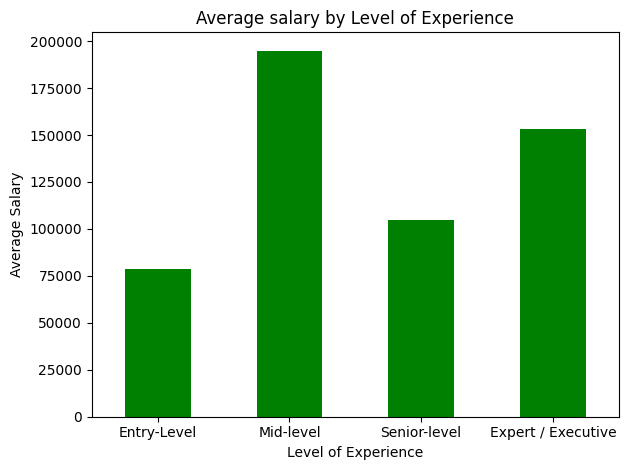

In [32]:
salary = df.groupby(df['experience_level'])['salary_in_usd'].mean()
job_level = ["Entry-Level","Mid-level","Senior-level","Expert / Executive"]
salary.plot(kind='bar', color="green")
plt.title("Average salary by Level of Experience")
plt.xticks(ticks=range(len(job_level)), labels=job_level, rotation=0)
plt.xlabel('Level of Experience')
plt.ylabel('Average Salary')
plt.tight_layout()
plt.show()


## 🧹 Part 3: Data Preprocessing for Linear Regression

We will predict `salary_in_usd` using **only numerical or encoded categorical features**.

### Steps:
1. Select features: `work_year`, `experience_level`, and optionally `job_title` (you decide!)
2. Encode categorical variables (`experience_level`) using `LabelEncoder` or `pd.get_dummies()`
3. Define `X` (features) and `y` (target = `salary_in_usd`)

> ⚠️ **Important**: Do NOT include `salary`, `salary_currency`, or `salary_in_usd` in your features!

In [42]:

# Example: Encode experience_level
le = LabelEncoder()
df['experience_level_encoded'] = le.fit_transform(df['experience_level'])

# Choose your features
features = ['work_year','experience_level', 'experience_level_encoded']
X = df[features]
y = df['salary_in_usd']

# Optional: Add more features like job_title (try it!)
# But remember: too many categories can hurt performance

X.head()

,work_year,experience_level,experience_level_encoded
0,2023,EN,0
1,2023,EN,0
2,2023,EN,0
3,2023,EN,0
4,2023,EN,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   work_year                 3761 non-null   int64 
 1   experience_level          3761 non-null   object
 2   employment_type           3761 non-null   object
 3   job_title                 3761 non-null   object
 4   salary                    3761 non-null   int64 
 5   salary_currency           3761 non-null   object
 6   salary_in_usd             3761 non-null   int64 
 7   company_location          3761 non-null   object
 8   company_size              3761 non-null   object
 9   experience_level_encoded  3761 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 294.0+ KB


In [71]:

# Example: Encode experience_level
le = LabelEncoder()
df['company_size_encoded'] = le.fit_transform(df['company_size'])
df['experience_level_encoded'] = le.fit_transform(df['experience_level'])
df['job_title_encoded'] = le.fit_transform(df['job_title'])
# Choose your features
features = ['work_year', 'experience_level_encoded', 'job_title_encoded','company_size_encoded']
X = df[features]
y = df['salary_in_usd']

# Optional: Add more features like job_title (try it!)
# But remember: too many categories can hurt performance

X.head()

,work_year,experience_level_encoded,job_title_encoded,company_size_encoded
0,2023,0,8,0
1,2023,0,8,0
2,2023,0,41,0
3,2023,0,22,0
4,2023,0,8,0


## 📈 Part 4: Train a Linear Regression Model

In [72]:
# Split data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

R² Score: 0.17
RMSE: 58323.90


## 🔮 Part 5: Predict 2024 Salaries

Now, create a small DataFrame for **2024** with different experience levels and predict their salaries.

Use the same encoding as before!

In [69]:
df['job_title'].head()

0          Applied Scientist
1          Applied Scientist
2       Data Quality Analyst
3    Compliance Data Analyst
4          Applied Scientist
Name: job_title, dtype: object

In [81]:
# Map experience levels to encoded values (check your LabelEncoder!)
# Example: EN=0, MI=1, SE=2, EX=3 (confirm with `le.classes_`)

future_data = pd.DataFrame({
    'work_year': [2024, 2024, 2024, 2024],
    'experience_level_encoded': [0, 1, 2, 3],  # EN, MI, SE, EX
      'job_title_encoded': [0, 1, 2, 3],
    'company_size_encoded': [0, 1, 2, 3],
})

# Predict
predicted_salaries = model.predict(future_data)

# Display results
results = pd.DataFrame({
    'Experience Level': ['Entry', 'Mid', 'Senior', 'Executive'],
    'Predicted 2024 Salary (USD)': predicted_salaries,
})
results

,Experience Level,Predicted 2024 Salary (USD)
0,Entry,103292.589788
1,Mid,118110.192652
2,Senior,132927.795515
3,Executive,147745.398379


## 📝 Part 6: Reflection (Answer in a Markdown Cell)

1. Does your model make reasonable predictions? Why or why not?
2. What are the limitations of using only `work_year` and `experience_level`?
3. How could you improve this model? (Think: more features, better encoding, etc.)
4. Why is **R² not enough** to trust your predictions?

> 💡 Remember: Linear regression assumes a **linear trend**—but real salaries may grow non-linearly!

## 1) Does your model make reasonable predictions? Why or why not
  <pre>Yes it does, it does this by basing its predictions from past trends and using the other categories which could affect the result. But it’s not very accurate because it doesn’t know other important things like the job type, company, or where the person works. So, the results are just rough guesses.</pre>
## 2) What are the limitations of using only work_year and experience_level?
<pre> The limitation on only using Work year and experience level is that its very simple, there are other categories that also affects the salary of a person such as their job, their location, and the size of their company to simply put, the salary of a person is not binded by the years of experience but by also other factors in their job</pre>

## 3) How could you improve this model? (Think: more features, better encoding, etc.)
<pre> You can make it better by adding more details, like job title, company size, or location. You can also use better ways to turn text into numbers (like one-hot encoding) and try smarter models like Random Forest or XGBoost. </pre>

## 4) Why is R² not enough to trust your predictions?
<pre> R² only tells how well the model fits the data you gave it. It doesn’t mean it will predict new data correctly. A model can have a high R² and still be bad at making real-world predictions. </pre>

## 📤 Submission Instructions

- Save this notebook as: `LastName_FirstName_SalaryPrediction.ipynb`
- Ensure all code runs without errors
- Include your answers to the reflection questions
- Submit via [your LMS/email/etc.]

Good luck! 🚀